#### 20/20.Good job Tom

In [1]:
#python version 3.11.4  conda version 23.7.3

In [2]:
import pandas as pd # v 1.5.3
import numpy as np # v 1.26.1
import sklearn # v 0.0.3
import pmdarima as pm # v 2.0.3
import statsmodels.api as sm # v 0.14.0
import matplotlib.pyplot as plt # 3.7.1
import sweetviz as sv # 2.2.1
import pytest_warnings as ww #v 0.3.1
import warnings as w
import statsmodels.tsa.stattools as stattools  # v 0.14.0
import matplotlib.pyplot as plt # 3.7.1


from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from statsmodels.tsa.stattools import adfuller # v 0.14.0
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # v 0.14.0
from statsmodels.tsa.arima_model import ARIMA # v 0.14.0

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


from sklearn.model_selection import KFold

In [3]:
ld = pd.read_csv(r"/Users/thomassniezek/Downloads/loan_default_data_set.csv")#r tells it to run row file path

In [4]:
ld.shape, ld.columns, ld.dtypes # this code tells how many columns there are, the names of the columns and the type each column is. It also says how many rows,in this case, there are 20000. 21 columns 

((20000, 21),
 Index(['tot_balance', 'avg_bal_cards', 'credit_age', 'credit_age_good_account',
        'credit_card_age', 'num_acc_30d_past_due_12_months',
        'num_acc_30d_past_due_6_months', 'num_mortgage_currently_past_due',
        'tot_amount_currently_past_due', 'num_inq_12_month',
        'num_card_inq_24_month', 'num_card_12_month', 'num_auto_ 36_month',
        'uti_open_card', 'pct_over_50_uti', 'uti_max_credit_line',
        'pct_card_over_50_uti', 'ind_XYZ', 'rep_income', 'rep_education',
        'Def_ind'],
       dtype='object'),
 tot_balance                        float64
 avg_bal_cards                      float64
 credit_age                           int64
 credit_age_good_account              int64
 credit_card_age                      int64
 num_acc_30d_past_due_12_months       int64
 num_acc_30d_past_due_6_months        int64
 num_mortgage_currently_past_due      int64
 tot_amount_currently_past_due      float64
 num_inq_12_month                     int64
 num_c

In [5]:
ld['Def_ind'].value_counts(normalize=True) #shows the y is not balanced. one is .9 and the other is .1


0    0.9
1    0.1
Name: Def_ind, dtype: float64

In [6]:
mean_rep_income = ld['rep_income'].mean()
mean_pct_card_over_50 = ld['pct_card_over_50_uti'].mean()
mode_rep_education = ld['rep_education'].mode().iloc[0]

# finds the mode and mean for the variables and assigns it to its own variable

In [7]:
# Fill missing values in the specified columns with their respective means
ld['rep_income'].fillna(mean_rep_income, inplace=True)
ld['pct_card_over_50_uti'].fillna(mean_pct_card_over_50, inplace=True)
ld['rep_education'].fillna(mode_rep_education, inplace=True)
#fills all of the none values with the variables we just created in the code before. 

In [8]:
my_report = sv.analyze(ld)

                                             |          | [  0%]   00:00 -> (? left)

In [9]:
my_report.show_html() #you can see there are no zero variables left 

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [10]:
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Use drop='first' to avoid multicollinearity
string_encoded = encoder.fit_transform(ld[['rep_education']]) # used to create a binary variable for our categorical variable, in this case rep_education
feature_names = encoder.get_feature_names_out(input_features=['rep_education']) # makes the names for the columns the same as the original
string_encoded_ld = pd.DataFrame(string_encoded, columns=feature_names) #creates a data frame from the data
ld = pd.concat([ld, string_encoded_ld], axis=1) # puts the two data frames together. 
X = ld.drop(['rep_education', 'Def_ind'], axis=1)  # Exclude the original string column
y = ld['Def_ind']  # sets the y value

In [11]:
ld['Def_ind'].value_counts(normalize=True)

0    0.9
1    0.1
Name: Def_ind, dtype: float64

In [12]:
minorityclass_1_data = ld[ld['Def_ind'] == 1] #seperates classes into subdatasets with class ==1 and class==0
majorityclass_0_data = ld[ld['Def_ind'] == 0]


In [13]:
minorityclass_1_data.shape #tells how many rows and columns 2000 data points


(2000, 24)

In [14]:
majorityclass_0_data.shape #18000 data points

(18000, 24)

In [15]:
desired_minority_samples = 18000 #says i want 18,000 data points in the minority

In [16]:
num_repeats = desired_minority_samples // len(minorityclass_1_data) #says the number of times I want to do the  resampling technique
remainder_samples = desired_minority_samples % len(minorityclass_1_data)

In [17]:
resampled_minority_data = [minorityclass_1_data] * num_repeats #says how many times you want to repeat the existing minority class data to achieve the desired number of samples. Replicates the existing minority class data num_repeats times. 
if remainder_samples > 0:
    resampled_minority_data.append(minority_class.sample(remainder_samples, replace=True)) #True makes it to sample with replacement

In [18]:
oversampled_ld = pd.concat([majorityclass_0_data] + resampled_minority_data) #Concatenates the data sets

In [19]:
oversampled_ld.shape #shows there are 36000 values. 

(36000, 24)

In [20]:
oversampled_ld['Def_ind'].value_counts(normalize=True) #shows the y is balanced. both are now at .5 


0    0.5
1    0.5
Name: Def_ind, dtype: float64

In [21]:
desired_majority_samples = 2000
undersampled_majority = majorityclass_0_data.sample(desired_majority_samples, random_state=6)# Randomly sample the majority class to achieve the desired number

undersampled_ld = pd.concat([minorityclass_1_data, undersampled_majority])# Concatenate the undersampled majority class data with the minority class


In [22]:
undersampled_ld.shape #shows there are 4000 values. 

(4000, 24)

In [23]:
undersampled_ld.columns

Index(['tot_balance', 'avg_bal_cards', 'credit_age', 'credit_age_good_account',
       'credit_card_age', 'num_acc_30d_past_due_12_months',
       'num_acc_30d_past_due_6_months', 'num_mortgage_currently_past_due',
       'tot_amount_currently_past_due', 'num_inq_12_month',
       'num_card_inq_24_month', 'num_card_12_month', 'num_auto_ 36_month',
       'uti_open_card', 'pct_over_50_uti', 'uti_max_credit_line',
       'pct_card_over_50_uti', 'ind_XYZ', 'rep_income', 'rep_education',
       'Def_ind', 'rep_education_graduate', 'rep_education_high_school',
       'rep_education_other'],
      dtype='object')

In [24]:
undersampled_ld['Def_ind'].value_counts(normalize=True) #shows the y is balanced. both are now at .5 

1    0.5
0    0.5
Name: Def_ind, dtype: float64

In [25]:
undersampled_ld.dtypes

tot_balance                        float64
avg_bal_cards                      float64
credit_age                           int64
credit_age_good_account              int64
credit_card_age                      int64
num_acc_30d_past_due_12_months       int64
num_acc_30d_past_due_6_months        int64
num_mortgage_currently_past_due      int64
tot_amount_currently_past_due      float64
num_inq_12_month                     int64
num_card_inq_24_month                int64
num_card_12_month                    int64
num_auto_ 36_month                   int64
uti_open_card                      float64
pct_over_50_uti                    float64
uti_max_credit_line                float64
pct_card_over_50_uti               float64
ind_XYZ                              int64
rep_income                         float64
rep_education                       object
Def_ind                              int64
rep_education_graduate             float64
rep_education_high_school          float64
rep_educati

In [26]:
# Initialize the SMOTE with a desired sampling strategy, such as 'auto' to balance classes
smote = SMOTE(sampling_strategy='auto', random_state=42)  # Use 'auto' to balance classes

# Perform SMOTE oversampling
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame for the oversampled smote data
smoteoversampled_ld = pd.DataFrame(X_resampled, columns=X.columns)
smoteoversampled_ld['Def_ind'] = y_resampled

In [27]:
smoteoversampled_ld['Def_ind'].value_counts(normalize=True) #shows the y is balanced. both are now at .5 

0    0.5
1    0.5
Name: Def_ind, dtype: float64

In [28]:
smoteoversampled_ld.shape, smoteoversampled_ld.columns, smoteoversampled_ld.dtypes #looking to see how many columns and rows, the names of the columns

((36000, 23),
 Index(['tot_balance', 'avg_bal_cards', 'credit_age', 'credit_age_good_account',
        'credit_card_age', 'num_acc_30d_past_due_12_months',
        'num_acc_30d_past_due_6_months', 'num_mortgage_currently_past_due',
        'tot_amount_currently_past_due', 'num_inq_12_month',
        'num_card_inq_24_month', 'num_card_12_month', 'num_auto_ 36_month',
        'uti_open_card', 'pct_over_50_uti', 'uti_max_credit_line',
        'pct_card_over_50_uti', 'ind_XYZ', 'rep_income',
        'rep_education_graduate', 'rep_education_high_school',
        'rep_education_other', 'Def_ind'],
       dtype='object'),
 tot_balance                        float64
 avg_bal_cards                      float64
 credit_age                           int64
 credit_age_good_account              int64
 credit_card_age                      int64
 num_acc_30d_past_due_12_months       int64
 num_acc_30d_past_due_6_months        int64
 num_mortgage_currently_past_due      int64
 tot_amount_currently_pas

In [29]:
my_report2 = sv.analyze(smoteoversampled_ld)
my_report2.show_html() #creates the sweetviz for smote so i could look at stuff

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [30]:
X_os = oversampled_ld.drop(['rep_education', 'Def_ind'], axis=1)  # Exclude the string column and y
y_os = oversampled_ld['Def_ind']  # sets the y value

In [31]:
Xos_train, Xos_test, yos_train, yos_test = train_test_split(X_os, y_os, test_size=0.3, random_state=6) #splits up the data using the train test split function, test size is 30% and random state so it can be replicated is 6

In [32]:
model = LogisticRegression(solver= 'saga', max_iter =10000) #creates the logistic regression class, 

In [33]:
LogisticRegression(solver= 'saga', max_iter =10000)

LogisticRegression(max_iter=10000, solver='saga')

In [34]:
model.fit(Xos_train,yos_train) #fits the training group

LogisticRegression(max_iter=10000, solver='saga')

In [35]:
yos_pred = model.predict(Xos_test)#makes the predictions

In [36]:
accuracyos = accuracy_score(yos_test, yos_pred)
precisionos = precision_score(yos_test, yos_pred, average='weighted')  # chose weighted becasue it calculates metrics for each class and takes the mean with class weights based on support.
recallos = recall_score(yos_test, yos_pred, average='weighted')

print(f"Accuracy OverSample: {accuracyos:.6f}") #prints each one and makes it have 6 significant figures. 
print(f"Precision OverSample: {precisionos:.6f}")
print(f"Recall OverSample: {recallos:.6f}")

Accuracy OverSample: 0.643426
Precision OverSample: 0.657503
Recall OverSample: 0.643426


In [37]:
X_us = undersampled_ld.drop(['rep_education', 'Def_ind'], axis=1)  # Exclude the string column and y
y_us = undersampled_ld['Def_ind']  # sets the y value

In [38]:
Xus_train, Xus_test, yus_train, yus_test = train_test_split(X_us, y_us, test_size=0.3, random_state=6)#splits up the data using the train test split function, test size is 30% and random state so it can be replicated is 6

In [39]:
model.fit(Xus_train,yus_train) #fits the model with the x training set and y training

LogisticRegression(max_iter=10000, solver='saga')

In [40]:
yus_pred = model.predict(Xus_test) #makes the predictions

In [41]:
accuracyus = accuracy_score(yus_test, yus_pred)
precisionus = precision_score(yus_test, yus_pred, average='weighted')  # chose weighted becasue it calculates metrics for each class and takes the mean with class weights based on support.
recallus = recall_score(yus_test, yus_pred, average='weighted')

print(f"Accuracy UnderSample: {accuracyus:.6f}") #prints each one and makes it have 6 significant figures. 
print(f"Precision UnderSample: {precisionus:.6f}")
print(f"Recall UnderSample: {recallus:.6f}")

Accuracy UnderSample: 0.668333
Precision UnderSample: 0.685190
Recall UnderSample: 0.668333


In [42]:
X_sm = smoteoversampled_ld.drop([ 'Def_ind'], axis=1)  # Exclude the y
y_sm = smoteoversampled_ld['Def_ind']  # sets the y value

In [43]:
Xsm_train, Xsm_test, ysm_train, ysm_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=6)#splits up the data using the train test split function, test size is 30% and random state so it can be replicated is 6

In [44]:
model.fit(Xsm_train,ysm_train)#fits the model with the x training set and y training

LogisticRegression(max_iter=10000, solver='saga')

In [45]:
ysm_pred = model.predict(Xsm_test)#makes the predictions

In [46]:
accuracysm = accuracy_score(ysm_test, ysm_pred)
precisionsm = precision_score(ysm_test, ysm_pred, average='weighted')  # chose weighted becasue it calculates metrics for each class and takes the mean with class weights based on support.
recallsm = recall_score(ysm_test, ysm_pred, average='weighted')

print(f"Accuracy Smote: {accuracysm:.6f}") #prints each one and makes it have 6 significant figures. 
print(f"Precision Smote: {precisionsm:.6f}")
print(f"Recall Smote: {recallsm:.6f}")

Accuracy Smote: 0.641389
Precision Smote: 0.649943
Recall Smote: 0.641389


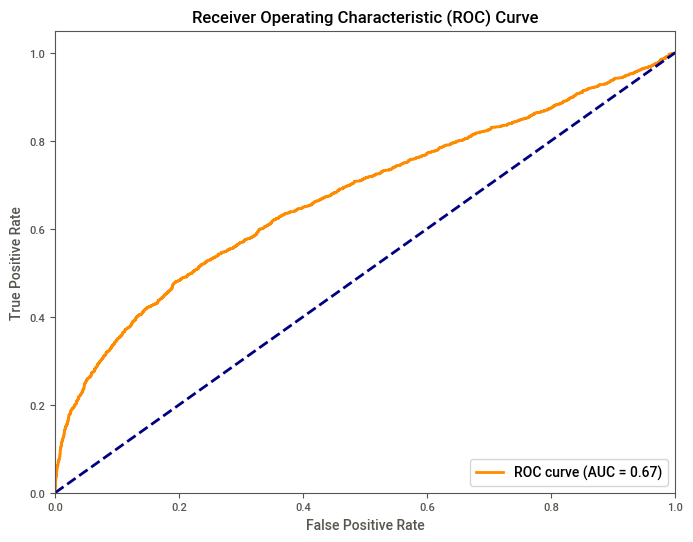

In [47]:
# Get predicted probabilities for the positive class
yos_prob = model.predict_proba(Xos_test)[:, 1]

# Calculate the ROC curve
fpros, tpros, thresholdsos = roc_curve(yos_test, yos_prob)

# Calculate the Area Under the Curve
roc_aucos = roc_auc_score(yos_test, yos_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpros, tpros, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_aucos:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

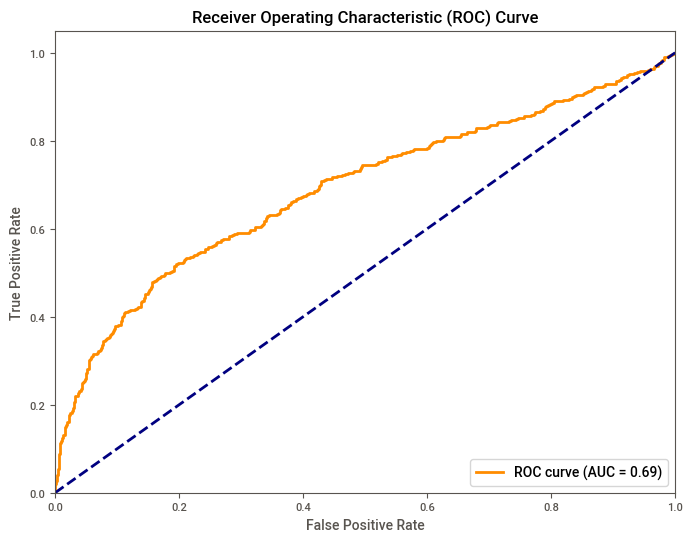

In [48]:
# Get predicted probabilities for the positive class
#Using the UnderSampling Method
yus_prob = model.predict_proba(Xus_test)[:, 1]

# Calculate the ROC curve
fprus, tprus, thresholdsus = roc_curve(yus_test, yus_prob)

# Calculate the Area Under the Curve
roc_aucus = roc_auc_score(yus_test, yus_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fprus, tprus, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_aucus:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

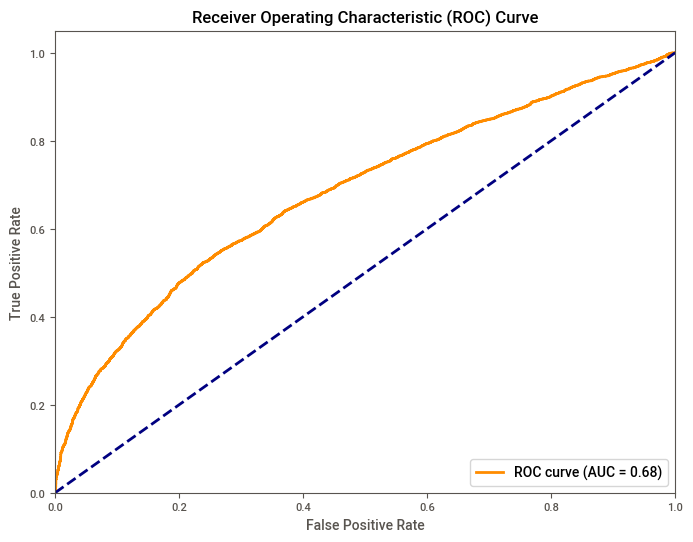

In [49]:
# Get predicted probabilities for the positive class
#Using the smote Method
ysm_prob = model.predict_proba(Xsm_test)[:, 1]

# Calculate the ROC curve
fprsm, tprsm, thresholdssm = roc_curve(ysm_test, ysm_prob)

# Calculate the Area Under the Curve
roc_aucsm = roc_auc_score(ysm_test, ysm_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fprsm, tprsm, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_aucsm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [50]:
# Based on the ROC Curve and the AUC number, I think the best model based on the curve is the UnderSampling model. The AUC is largest which is .69 which is a little better than random guessing. The ROC curve is the largest distance away from the dashed line. 

In [51]:
model2 = LinearDiscriminantAnalysis() #creates the LDA class

In [52]:
LinearDiscriminantAnalysis()

LinearDiscriminantAnalysis()

In [53]:
model2.fit(Xos_train, yos_train)
y2os_pred = model2.predict(Xos_test)
model2.coef_ #coefficient for each column

accuracy_OS2 = accuracy_score(yos_test, y2os_pred)
precision_OS2 = precision_score(yos_test, y2os_pred, average='weighted')  # chose weighted becasue it calculates metrics for each class and takes the mean with class weights based on support.
recall_OS2 = recall_score(yos_test, y2os_pred, average='weighted')

print(f"Accuracy OS 2: {accuracy_OS2:.6f}") #prints each one and makes it have 6 significant figures. 
print(f"Precision OS 2: {precision_OS2:.6f}")
print(f"Recall OS 2: {recall_OS2:.6f}")


Accuracy OS 2: 0.725648
Precision OS 2: 0.726517
Recall OS 2: 0.725648


In [54]:
model2.fit(Xus_train, yus_train)
y2us_pred = model2.predict(Xus_test)
model2.coef_ #coefficient for each column

accuracy_US2 = accuracy_score(yus_test, y2us_pred)
precision_US2 = precision_score(yus_test, y2us_pred, average='weighted')  # chose weighted becasue it calculates metrics for each class and takes the mean with class weights based on support.
recall_US2 = recall_score(yus_test, y2us_pred, average='weighted')

print(f"Accuracy OS 2: {accuracy_US2:.6f}") #prints each one and makes it have 6 significant figures. 
print(f"Precision OS 2: {precision_US2:.6f}")
print(f"Recall OS 2: {recall_US2:.6f}")

Accuracy OS 2: 0.725833
Precision OS 2: 0.726584
Recall OS 2: 0.725833


In [55]:
model2.fit(Xsm_train, ysm_train)
y2sm_pred = model2.predict(Xsm_test)
model2.coef_ #coefficient for each column

accuracy_sm2 = accuracy_score(ysm_test, y2sm_pred)
precision_sm2 = precision_score(ysm_test, y2sm_pred, average='weighted')  # chose weighted becasue it calculates metrics for each class and takes the mean with class weights based on support.
recall_sm2 = recall_score(ysm_test, y2sm_pred, average='weighted')

print(f"Accuracy Sm 2: {accuracy_sm2:.6f}") #prints each one and makes it have 6 significant figures. 
print(f"Precision Sm 2: {precision_sm2:.6f}")
print(f"Recall Sm 2: {recall_sm2:.6f}")

Accuracy Sm 2: 0.755185
Precision Sm 2: 0.756587
Recall Sm 2: 0.755185


In [56]:
# For Accuracy Precision and Recall, The OverSampling and Smote logistic regression methods had it around .64, so they were correct around 64% of the time.On the otherhand, the Undersampling had it at about .68, so it was correct about 68% of the time. 4% better than the OverSampling and Smote. 

In [57]:
#For the LDA, the Undersamplin and OverSampling models had their accuracy, precision anad recall all around .72 or correct about 72% of the time. For smote on the otherhand, The three were all around .75, so 75% correct. This was 3% better than the OverSampling and Undersampling techniques. 

In [58]:
#Because the UnderSampling technique was 4% better for the logistic regression and it had a better ROC_AUC, I would take the Undersampling method as my method of choice. It performed better than Smote and OverSampling on 2/3 tests. 

In [59]:
# Since it performed better on 2/3 tests, I think it would be a better model in general. 